In [1]:
import os 
import sys
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pysm3
import pysm3.units as usm

In [3]:
import astropy.units as u 
import astropy.wcs.wcs as wcs

In [4]:
from astropy.io import fits

In [5]:
NSIDE =512

In [6]:
rGC = hp.rotator.Rotator(coord=['G','C'])  # Transforms galactic to equatorial coordinates
rCG = hp.rotator.Rotator(coord=['C','G'])  # Transforms equatorial to galactic coordinates


In [7]:
healpixmap = hp.read_map(filename='cmb_030_GC_nside.FITS',field=None)

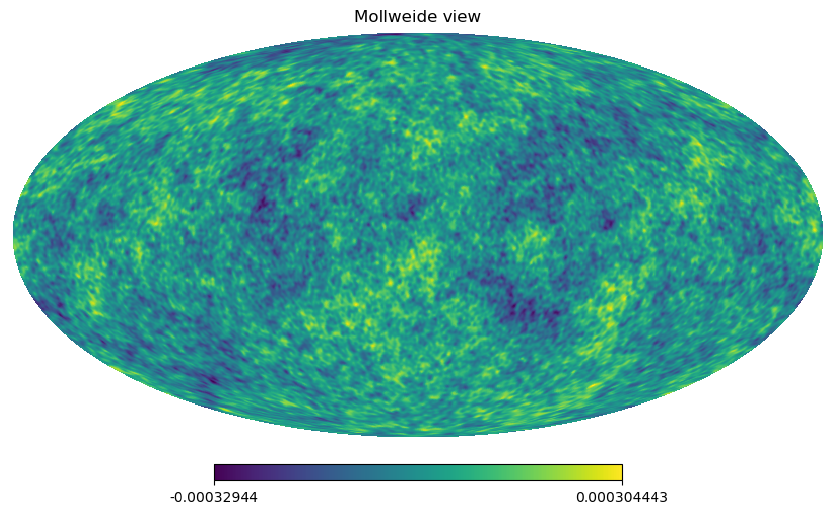

In [8]:
hp.mollview(healpixmap[0])

In [9]:
print(healpixmap.shape)
print(type(healpixmap))

(3, 3145728)
<class 'numpy.ndarray'>


## Map with galactic foregrounds

In [10]:
sky_test = pysm3.Sky(nside=NSIDE,preset_strings=["d0","s0"])

In [11]:
map_test = sky_test.get_emission(freq=30*u.GHz)

In [12]:
map_test.shape

(3, 3145728)

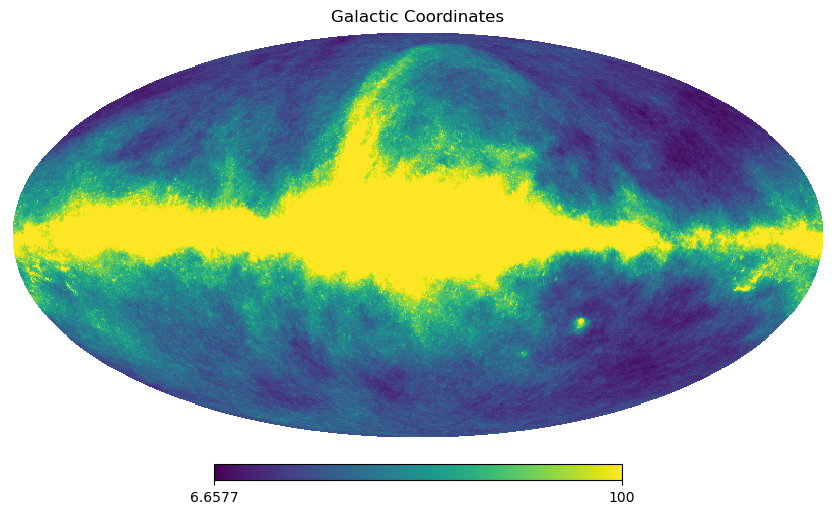

In [19]:
hp.mollview(map_test[0],max = 100,title='Galactic Coordinates')

In [16]:
sky_test_GC = rGC.rotate_map_pixel(map_test)

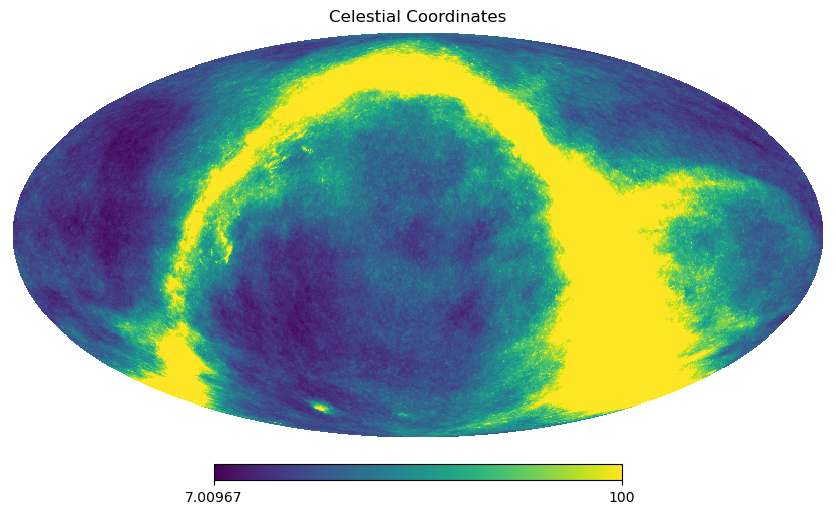

In [20]:
hp.mollview(sky_test_GC[0],max = 100,title='Celestial Coordinates')

In [22]:
hp.write_map(filename='d0s0_GC_30GHz.FITS',m=sky_test_GC)

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


In [23]:
hp.write_map(filename='d0s0_30GHz.FITS',m=map_test)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]
